# Schlogl's model

This example shows how the model representing Schlogl's system of chemical reactions can be used ([Schlogl, 1972](https://link.springer.com/content/pdf/10.1007/BF01379769.pdf)).
This model describes the stochastic process made of four chemical reactions, two of them being the reverse of another, that take place on a single molecule type.
Given an initial concentration of the substance, $n_0$, the process can be described by the following equations:
   $$2A \xrightarrow{k_1} 3A$$
   $$3A \xrightarrow{k_2} 2A$$
   $$\emptyset \xrightarrow{k_3} A$$
   $$A \xrightarrow{k_4} \emptyset$$

The model is simulated according to the Gillespie stochastic simulation algorithm (Gillespie, 1976).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pints
import pints.toy as toy
import pints.toy.stochastic

Specify the initial concentration, and select time points at which to record concentration values, and the rate constant values $k_1$, $k_2$, $k_3$, $k_4$:

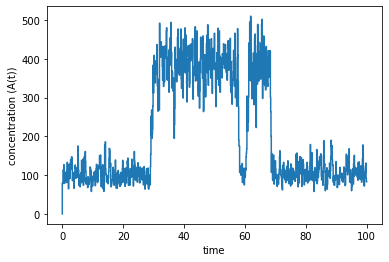

In [2]:
n_0 = 0
model = toy.stochastic.SchloglModel(n_0)

times = np.linspace(0, 100, 1000)
k = model.suggested_parameters()

values = model.simulate(k, times)

plt.step(times, values)
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.show()

Given the stochastic nature of this model, every iteration returns a different result. However, we can compute deterministically the solution to the ODE equivalent(Erban et al., 2007): $ \frac{\text{d}a}{\text{d}t} = -k_2 a^3 + k_1 a^2 - k_4 a + k_3 $.

We will plot the ODE solution, and compare it to the stochastic simulation to show that the two functions are similar.


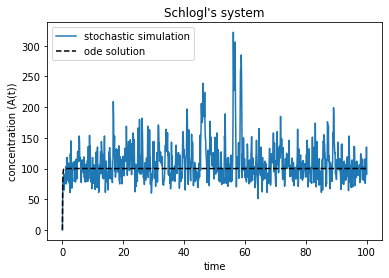

In [5]:
def pend(y, t):
    dydt = [-k[1] * (y[0] ** 3) + k[0] * (y[0] ** 2) - k[3] * y[0] + k[2]]
    return dydt

x_0 = [0]
times = np.linspace(0, 100, 1000)

from scipy.integrate import odeint
sol = odeint(pend, x_0, times)

    
plt.title('Schlogl\'s system')
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.plot(times, values, label='stochastic simulation')
plt.plot(times, sol,'--', color='black', label='ode solution')
plt.legend()
plt.show()